# GRIP TASK -1 SPARKS FOUNDATION

# ANUJITH UNNI

# PRECICT THE PERCENTAGE OF STUDENT BASED ON NO OF HOURS

# PREDICTION USING SUPERVISED ML

##  WHAT WILL BE THE PREDICTED SCORE IF STUDENT STUDIES 9.25 hrs A DAY

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# reading the data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

In [3]:
# gives the first 5 rows
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
# displaying structure of the file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# searching for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## data visualization

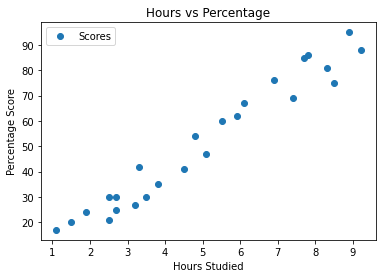

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## the graph displays a linear regression between scores and hours

# data pre-processing

In [9]:
# splitting the dependent and independent variable
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [10]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [11]:
#Prediction of model using test data
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# comparison of actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# training and testing score for the data
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


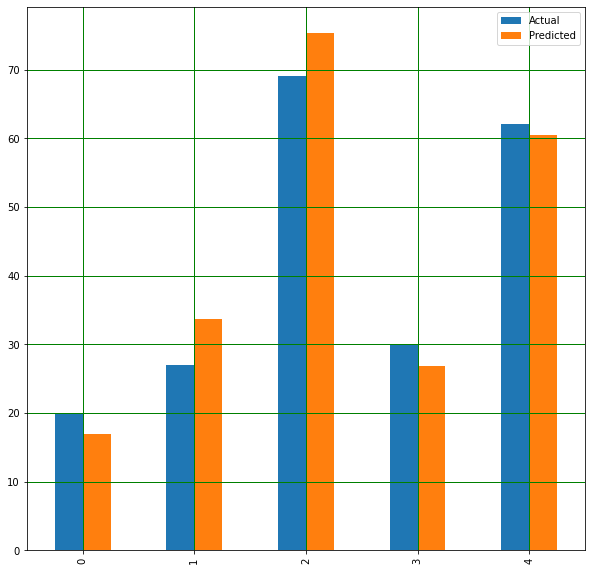

In [14]:
#visualization for the training and testing score
df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linewidth='1.0', color='green')
plt.grid(which='minor', linewidth='1.0', color='blue')
plt.show()

# testing of the data

In [15]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours studied = 9.25
Predicted Score = 93.69173248737538


# model evaluation

In [16]:
from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Mean Absolute Error: 4.183859899002975
R-2: 0.9454906892105356


# The R-2 got is a good score and accuracy of model is 94.5% and the Predicted score of student comes to be 93.692 If a student studies for 9.25 Hours per day